# Installation and Quickstart

This page will explain how to get started using the summer library.

## Installation

You can install summer from PyPI using the pip package manager

```bash
pip install summerepi
```

Then you can import the library as `summer` and get started building compartmental disease models. You can find a [list of examples](./examples/index.html) and [detailed API documentation](/api/index.html) on this site.

## Quick Example Model

This is a short example on how summer can be used. See the [list of examples](./examples/index.html) for more.

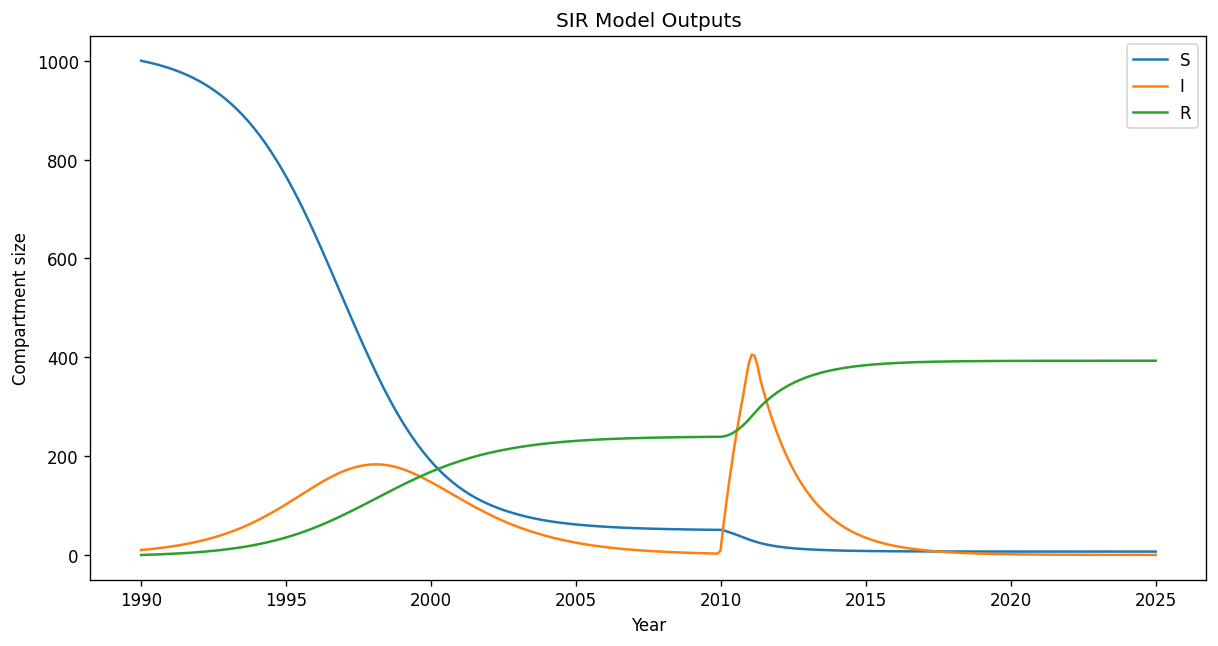

In [43]:
import matplotlib.pyplot as plt

from summer import CompartmentalModel

# Create a model.
model = CompartmentalModel(
    times=[1990, 2025],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

# Add people to the model.
model.set_initial_population(distribution={"S": 1000, "I": 10})

# Add intercompartmental flows.
model.add_infection_frequency_flow(name="infection", contact_rate=1.2, source="S", dest="I")
model.add_transition_flow(name="recovery", fractional_rate=1/6, source="I", dest="R")
model.add_death_flow(name="infection_death", death_rate=0.5, source="I")

# Spice up the model by importing 500 infected people over the course of 2010.
get_infected_imports = lambda t: 500 if 2010 < t <= 2011 else 0
model.add_importation_flow('infected_imports', get_infected_imports, 'I')

# Run the model
model.run()

# Plot the model results.
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
for i in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Year")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
plt.show()
